<a href="https://colab.research.google.com/github/Arnabb84/setups/blob/main/ADM_Assignment_2_Group2_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ADM_Assignment-2

## *Credit Card Fraud Detection*

## Group 02
1. ARNAB BHATTACHARJEE (2022aa05249@wilp.bits-pilani.ac.in)
2. TANMOY BARMAN (2022aa05260@wilp.bits-pilani.ac.in)
3. SHUBHAM BHATIA (2022aa05365@wilp.bits-pilani.ac.in)

Equal contribution by all 3 memobers.

# Problem statment:
In this ADM assignment-2 we need to detect **Credit Card Fraud Detection**
using the data given.

Following tasks needs to be performed.

•	Understanding -Problem statement

•	Perform exploratory data analysis

•	Preprocess the data

•	Select Training data, test data

•	Train the model

•	Test the model (Predictions and reporting)

•	Evaluate the model performance

•	Suggest ways of improving the model


## Python module installation

In [ ]:
# Automate the ML model search
!pip install tpot
# Convert this notebook to html
!pip install nbconvert

## Import Python modules

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
from tpot import TPOTClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

## Load credit card fraud dataset

In [ ]:
# Load the csv file in pandas as a df (dataframe)
df = pd.read_csv('card_transdata.csv', index_col = False)
# Get info on the dataframe columns and it's datatype
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000000 entries, 0 to 999999
Data columns (total 8 columns):
 #   Column                          Non-Null Count    Dtype  
---  ------                          --------------    -----  
 0   distance_from_home              1000000 non-null  float64
 1   distance_from_last_transaction  1000000 non-null  float64
 2   ratio_to_median_purchase_price  1000000 non-null  float64
 3   repeat_retailer                 1000000 non-null  float64
 4   used_chip                       1000000 non-null  float64
 5   used_pin_number                 1000000 non-null  float64
 6   online_order                    1000000 non-null  float64
 7   fraud                           1000000 non-null  float64
dtypes: float64(8)
memory usage: 61.0 MB


## Dataset exploration

### Dataset statistics

In [ ]:
# Check the first 5 datapoints for understanding the data range
display(df.head())
print('\n ')

# Generate descriptive statistics of a DataFrame
'''
Count: The number of non-null (non-missing) values in the DataFrame or Series.
Mean (Average): The arithmetic mean of the data, calculated by summing all values and dividing by the count.
Standard Deviation: A measure of the spread or dispersion of the data, indicating how much the data points deviate from the mean.
Minimum: The minimum (smallest) value in the data.
25th Percentile (Q1): The value below which 25% of the data falls. This is also known as the first quartile.
Median (50th Percentile or Q2): The middle value when the data is sorted in ascending order. It represents the 50th percentile of the data.
75th Percentile (Q3): The value below which 75% of the data falls. This is also known as the third quartile.
Maximum: The maximum (largest) value in the data.
'''
display(df.describe())

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,57.877857,0.311140,1.945940,1.0,1.0,0.0,0.0,0.0
1,10.829943,0.175592,1.294219,1.0,0.0,0.0,0.0,0.0
2,5.091079,0.805153,0.427715,1.0,0.0,0.0,1.0,0.0
3,2.247564,5.600044,0.362663,1.0,1.0,0.0,1.0,0.0
4,44.190936,0.566486,2.222767,1.0,1.0,0.0,1.0,0.0


,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000,1000000.000000
mean,26.628792,5.036519,1.824182,0.881536,0.350399,0.100608,0.650552,0.087403
std,65.390784,25.843093,2.799589,0.323157,0.477095,0.300809,0.476796,0.282425
min,0.004874,0.000118,0.004399,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.878008,0.296671,0.475673,1.000000,0.000000,0.000000,0.000000,0.000000
50%,9.967760,0.998650,0.997717,1.000000,0.000000,0.000000,1.000000,0.000000
75%,25.743985,3.355748,2.096370,1.000000,1.000000,0.000000,1.000000,0.000000
max,10632.723672,11851.104565,267.802942,1.000000,1.000000,1.000000,1.000000,1.000000


### Dataset Boxplot for outlier detection

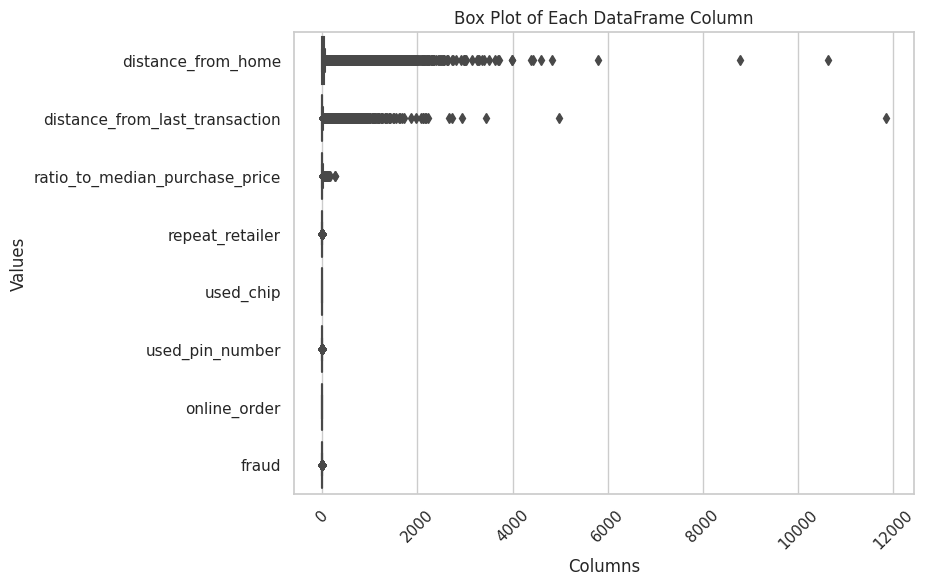

In [ ]:
def boxplot(df):
  sns.set(style="whitegrid")
  # Create box plots for each column
  plt.figure(figsize=(8, 6))
  sns.boxplot(data=df, orient="h")  # "v" for vertical, "h" for horizontal
  plt.title("Box Plot of Each DataFrame Column")
  plt.xlabel("Columns")
  plt.ylabel("Values")
  plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
  plt.show()

# Boxplot (box-and-whisker plot) for a graphical representation of the distribution of values within each numerical column of the DataFrame.
'''
Provides these insights-
  Central Tendency: The median line shows the central value of the data distribution. If the median is closer to one end of the box, it suggests skewness in the data.
  Spread: The length of the box indicates the spread or variability of the data within the IQR. A longer box suggests a wider spread of values.
  Outliers: Outliers can be identified as individual points outside the whiskers. They may indicate data points that are significantly different from the bulk of the data.
  Skewness: The position of the median within the box can provide hints about the skewness of the data. If the median is closer to the bottom of the box, it suggests positive skew (right-skewed), while if it's closer to the top, it suggests negative skew (left-skewed).
'''
boxplot(df)

### Pairplot of features using KDE

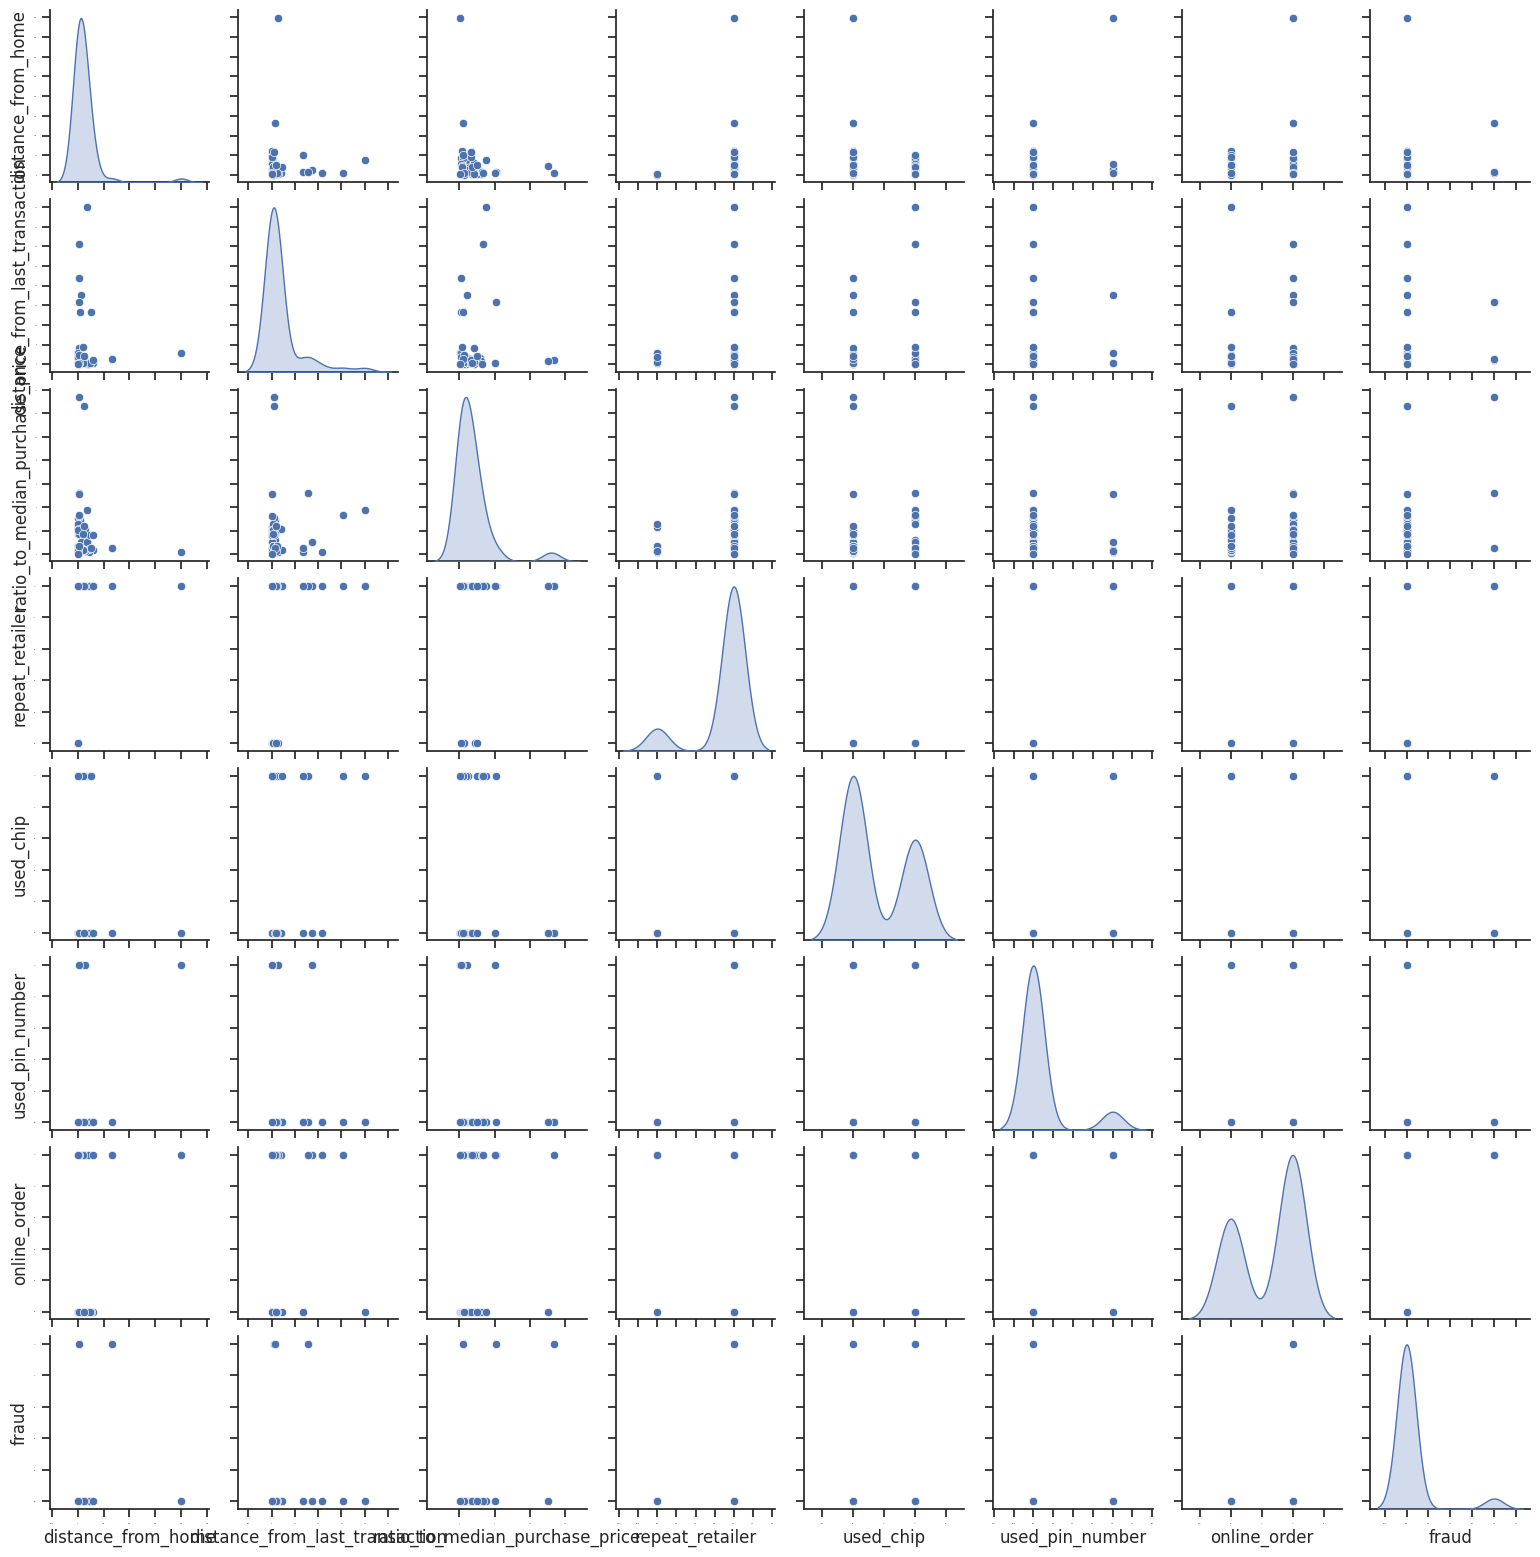

In [ ]:
# Examine the pairwise relationships using Scatterplot for looking at the correlation & histogram/KDE (Kernel Density Estimation)

sns.set(style="ticks")
g = sns.pairplot(df.sample(50), height=2, diag_kind='kde')
# Adjust the x-axis and y-axis label font size
for ax in g.axes.flat:
    ax.xaxis.set_tick_params(labelsize=1)  # Adjust the font size as needed
    ax.yaxis.set_tick_params(labelsize=1)  # Adjust the font size as needed

plt.show()

## Remove outliers using IQR method

In [ ]:
df_selected = df[['distance_from_home', 'distance_from_last_transaction']]

# Calculate the IQR for each column
Q1 = df_selected.quantile(0.25)
Q3 = df_selected.quantile(0.75)
IQR = Q3 - Q1

# Define a threshold for identifying outliers
threshold = 3.5

# Identify outliers using the IQR method
outlier_indices = ((df_selected < (Q1 - threshold * IQR)) | (df_selected > (Q3 + threshold * IQR))).any(axis=1)

# Get the rows with outliers
outliers = df_selected[outlier_indices]
print('Outliers method: IQR with Threshold=%.1f' %(threshold))
print('Outliers features:', outliers.columns.to_list())
print('Number of outliers:', outliers.shape[0])
print('Total datapoints:', df_selected.index.size)
print('Outlier percentage = %.2f%%'%(100 * outliers.shape[0]/df_selected.index.size))

Outliers method: IQR with Threshold=3.5
Outliers features: ['distance_from_home', 'distance_from_last_transaction']
Number of outliers: 115164
Total datapoints: 1000000
Outlier percentage = 11.52%


In [ ]:
df_no_outliers = df[~outlier_indices]

## Normalize dataset

In [ ]:
# Normalize dataset so that they are in the same data range
# Create a MinMaxScaler instance
scaler = MinMaxScaler()

# Fit and transform the scaler on your DataFrame
df_scaled = pd.DataFrame(scaler.fit_transform(df_no_outliers), columns=df_no_outliers.columns)
df_scaled.head()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
0,0.565887,0.022117,0.007250,1.0,1.0,0.0,0.0,0.0
1,0.105848,0.012478,0.004816,1.0,0.0,0.0,0.0,0.0
2,0.049733,0.057248,0.001581,1.0,0.0,0.0,1.0,0.0
3,0.021929,0.398221,0.001338,1.0,1.0,0.0,1.0,0.0
4,0.432055,0.040276,0.008284,1.0,1.0,0.0,1.0,0.0


## After normalization

In [ ]:
df_scaled.describe()

,distance_from_home,distance_from_last_transaction,ratio_to_median_purchase_price,repeat_retailer,used_chip,used_pin_number,online_order,fraud
count,884836.000000,884836.000000,884836.000000,884836.000000,884836.000000,884836.000000,884836.000000,884836.000000
mean,0.165043,0.143246,0.006799,0.875709,0.350560,0.100743,0.650293,0.063385
std,0.193257,0.195515,0.010518,0.329913,0.477146,0.300988,0.476878,0.243654
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.035877,0.019030,0.001761,1.000000,0.000000,0.000000,0.000000,0.000000
50%,0.089575,0.060582,0.003708,1.000000,0.000000,0.000000,1.000000,0.000000
75%,0.215457,0.180150,0.007808,1.000000,1.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Feature Selection

### Dataset correlation matrix

#### Look for feature correlation & remove correlated features

Candidate Features: {'repeat_retailer', 'ratio_to_median_purchase_price', 'online_order', 'used_pin_number', 'distance_from_last_transaction', 'used_chip', 'distance_from_home'}
Target Feature: fraud


<ipython-input-134-91f65bb2a749>:6: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  dataset = df_scaled[candidate_features]
<ipython-input-134-91f65bb2a749>:9: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  correlation_matrix = df_scaled[candidate_features].corr()


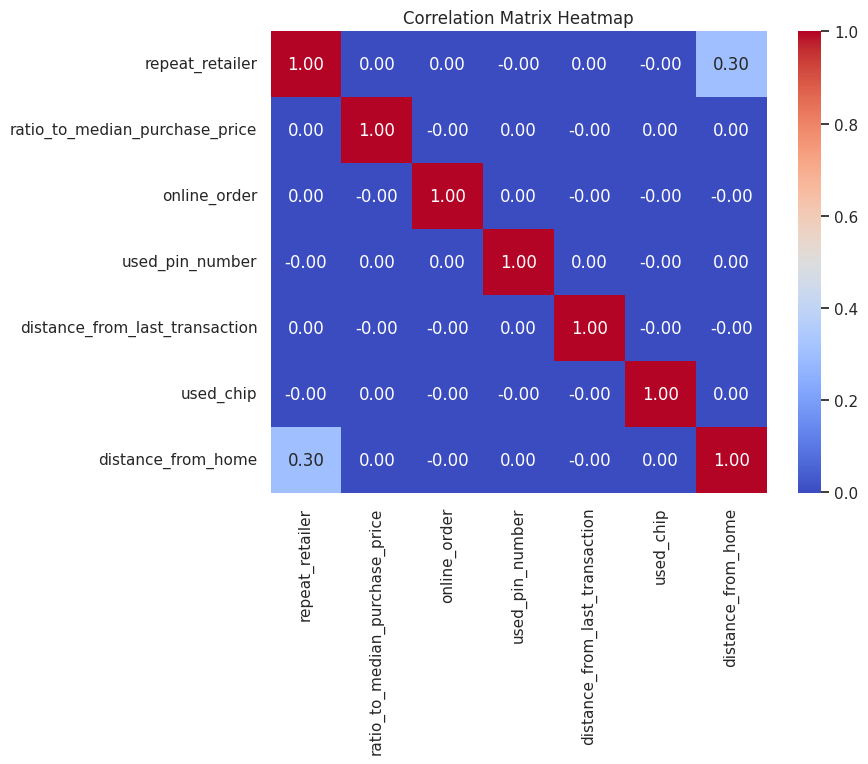

In [ ]:
# candidate features for training
target_feature = 'fraud'
candidate_features = set(df_scaled.columns.to_list()) - set([target_feature])
print("Candidate Features:", candidate_features)
print("Target Feature:", target_feature)
dataset = df_scaled[candidate_features]
target = df_scaled[target_feature]

correlation_matrix = df_scaled[candidate_features].corr()
plt.figure(figsize=(8, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Matrix Heatmap")
plt.show()

## Dataset Preparation

In [ ]:
# Split the dataset into 80:20 training and testing sets.
X_train, X_test, y_train, y_test = train_test_split(dataset, target, test_size=0.2, random_state=42)
X_train_with_target = pd.merge(X_train, y_train, left_index=True, right_index=True)
print('Xtrain:', X_train.shape, 'y_train:', y_train.shape)
print('Xtest:', X_test.shape, 'y_test:', y_test.shape)

Xtrain: (707868, 7) y_train: (707868,)
Xtest: (176968, 7) y_test: (176968,)


## ML model selection

In [ ]:
# Automate the process of building the ML model using TPOT
tpot = TPOTClassifier( generations=5, population_size=20, random_state=42, verbosity=2 )
# Get a small sample for automation
sample_size = 5000
X_sample, y_sample = X_train[:sample_size], y_train[:sample_size]
tpot.fit(X_sample, y_sample)

Optimization Progress:   0%|          | 0/120 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.9964000000000001

Generation 2 - Current best internal CV score: 0.9978

Generation 3 - Current best internal CV score: 0.9978

Generation 4 - Current best internal CV score: 0.9978

Generation 5 - Current best internal CV score: 0.9978

Best pipeline: ExtraTreesClassifier(input_matrix, bootstrap=True, criterion=entropy, max_features=0.8, min_samples_leaf=2, min_samples_split=5, n_estimators=100)


TPOTClassifier(generations=5, population_size=20, random_state=42, verbosity=2)

In [ ]:
best_pipeline = tpot.fitted_pipeline_
print(best_pipeline)

Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.8, min_samples_leaf=2,
                                      min_samples_split=5, random_state=42))])


## Model training

In [ ]:
best_pipeline.fit(X_train, y_train)

Pipeline(steps=[('extratreesclassifier',
                 ExtraTreesClassifier(bootstrap=True, criterion='entropy',
                                      max_features=0.8, min_samples_leaf=2,
                                      min_samples_split=5, random_state=42))])

## Model Inference

In [ ]:
y_pred = best_pipeline.predict(X_test)

## Model Evaluation

*   **Confusion Matrix** which tells us TP (True Positive), TN (True Negative), FP (False Positive), FN (False Negative).

Helps in calculating the following metrics.
*   **Accuracy** measures overall correctness.
*   **Recall** focuses on minimizing false negatives.
*   **Precision** focuses on minimizing false positives.
*   **F1 Score** balances precision and recall.



In [ ]:
def evaluate_model(y_gt, y_pred):
  # Compute confusion matrix
  cm = confusion_matrix(y_gt, y_pred)
  # Compute accuracy
  accuracy = accuracy_score(y_gt, y_pred)
  # Compute recall
  recall = recall_score(y_gt, y_pred, average='macro')
  # Compute precision
  precision = precision_score(y_gt, y_pred, average='macro')
  # Compute F1-score
  f1 = f1_score(y_gt, y_pred, average='macro')
  # Create a DataFrame
  metrics_df = pd.DataFrame({
    'Metric': ['Accuracy', 'Recall', 'Precision', 'F1-Score'],
    'Value': [accuracy, recall, precision, f1]
  })
  print("Confusion Matrix:\n", cm)
  # Print the DataFrame
  print('\n', metrics_df)

### Confusion Matrix & Accuracy scores

In [ ]:
evaluate_model(y_test, y_pred)

Confusion Matrix:
 [[165728      0]
 [     4  11236]]

       Metric     Value
0   Accuracy  0.999977
1     Recall  0.999822
2  Precision  0.999988
3   F1-Score  0.999905


### ROC and AUC curve

    An Area Under the Receiver Operating Characteristic Curve (AUC) of 1.0 (or 100%) indicates a perfect classifier's performance. In the context of binary classification models, the Receiver Operating Characteristic (ROC) curve is a graphical representation of a model's ability to discriminate between the two classes (e.g., positive and negative) across different thresholds.

    The ROC curve plots the True Positive Rate (Sensitivity) on the y-axis against the False Positive Rate (1 - Specificity) on the x-axis as the decision threshold varies. A perfect classifier achieves a True Positive Rate of 1 and a False Positive Rate of 0 across all possible thresholds, resulting in an AUC of 1.0.

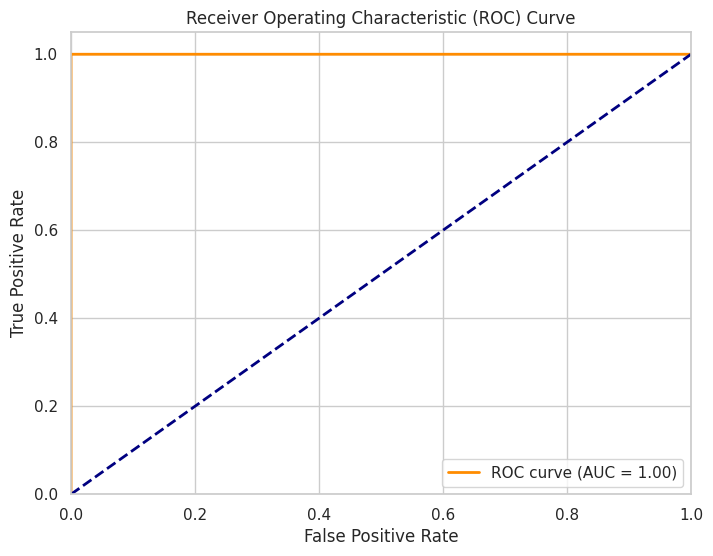

In [ ]:
# Make predictions on the test set
y_pred = best_pipeline.predict_proba(X_test)[:, 1]  # Probability of class 1

# Calculate ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred)

# Calculate AUC (Area Under the Curve)
roc_auc = auc(fpr, tpr)

# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

### Important Features

In [ ]:
print(best_pipeline.named_steps)
list(best_pipeline.named_steps.keys())[0]

{'extratreesclassifier': ExtraTreesClassifier(bootstrap=True, criterion='entropy', max_features=0.8,
                     min_samples_leaf=2, min_samples_split=5, random_state=42)}


'extratreesclassifier'

Best Model: extratreesclassifier


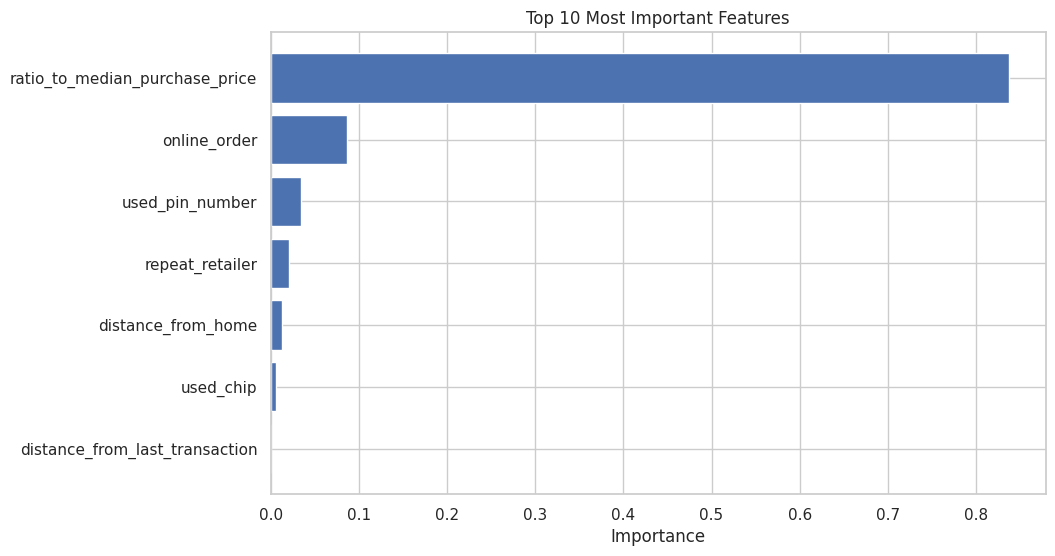

In [ ]:
best_model = list(best_pipeline.named_steps.keys())[0]
print('Best Model:', best_model)
feature_importances = best_pipeline.named_steps[best_model].feature_importances_
# Get the names of the features
feature_names = X_train.columns  # Assuming X_train is a DataFrame

# Create a DataFrame to display feature importances
feature_importance_df = pd.DataFrame({'Feature': feature_names, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Plot the top N most important features
top_n = 10  # Adjust as needed
plt.figure(figsize=(10, 6))
plt.barh(feature_importance_df['Feature'][:top_n], feature_importance_df['Importance'][:top_n])
plt.xlabel('Importance')
plt.title('Top {} Most Important Features'.format(top_n))
plt.gca().invert_yaxis()  # Invert the y-axis to display the most important features at the top
plt.show()

## Conclusion

1) We trained a ML model to perform a Credit Card Fraud Detection. Where the training features and test feature

    Training Features: {'repeat_retailer', 'ratio_to_median_purchase_price', 'online_order', 'used_pin_number', 'distance_from_last_transaction', 'used_chip', 'distance_from_home'}
    Target Feature: fraud

2) The ML model attained a very high accuracy of 99% on the test sample size of 176968.

3) The Best Model was attained using a  **ExtraTreesClassifier**, short for "Extremely Randomized Trees Classifier.

    Like the Random Forest, the ExtraTreesClassifier is an ensemble method that builds multiple decision trees and combines their predictions to make more robust and accurate predictions.

4) Based on our modelling we found that the best features for modelling is that of **ratio_to_median_purchase_price** with a feature importance of 80%.

5) The Model has an Area Under Curve (AUC) of 1.0 (or 100%) indicating a perfect classifier's performance. Where, the model's performance is ideal, and there is no overlap between the two classes probability distributions.

6) Outlier detection was done using **IQR (Inter-Quartile Range) method**, which resulted in removal of 11% of samples.

7) The correlation matrix didn't demonstrate any major correlation between the features, thus all features were used for training.

8) The ML model is satisfactory and best for this dataset, unless some constraint is provided.